In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from wordcloud import WordCloud

tqdm.pandas()

In [18]:
stopword = []
with open('combined_stop_words.txt', 'r') as txt:
     for line in txt:
        stopword.append(line.strip())

In [11]:
model_lbl_similarities = pd.read_csv('model_docs_lbl_similarities.csv')

In [ ]:
model_lbl_similarities

In [9]:
model_lbl_similarities['at'].max()

'2022-10-12 15:00:53'

In [10]:
model_lbl_similarities['at'].min()

'2016-06-07 11:44:23'

## Jumlah review per rating

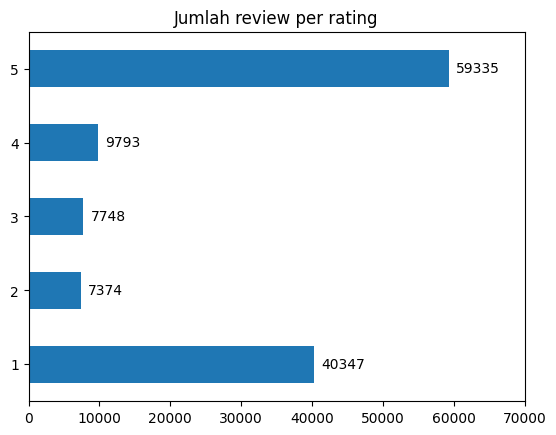

In [92]:
ax = model_lbl_similarities['score'].value_counts().sort_index().plot(kind='barh')
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=70000)
plt.title('Jumlah review per rating')

plt.show()

## Jumlah rating per label

<AxesSubplot: ylabel='score'>

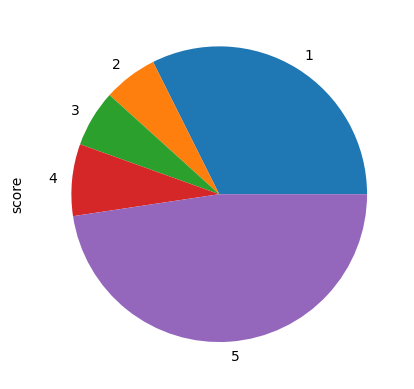

In [3]:
# pie chart
model_lbl_similarities['score'].value_counts().sort_index().plot(kind='pie')

In [6]:
model_lbl_similarities[model_lbl_similarities['most_similar_label'] == 'user_experience']['score'].value_counts().sort_index()

1    19875
2     2791
3     3251
4     5575
5    38998
Name: score, dtype: int64

In [157]:
def label_per_rating(label, offset = 5000):
    ax = model_lbl_similarities[model_lbl_similarities['most_similar_label'] == label]['score'].value_counts().sort_index().plot(kind='barh')
    ax.bar_label(ax.containers[0], padding=5)
    ax.set_xlim(right = np.max(model_lbl_similarities[model_lbl_similarities['most_similar_label'] == label]['score'].value_counts()) + offset )

    return ax


In [154]:
set(model_lbl_similarities['most_similar_label'])

{'authentication_and_account',
 'faskes',
 'payment',
 'server',
 'user_experience'}

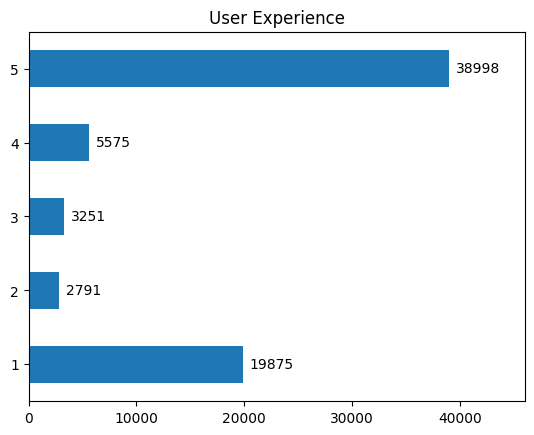

In [194]:
label_per_rating('user_experience', offset=7000)
plt.title('User Experience')

plt.show()

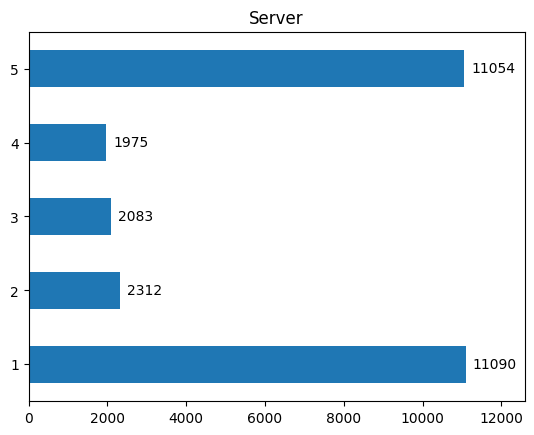

In [195]:
label_per_rating('server', offset=1500)
plt.title('Server')

plt.show()

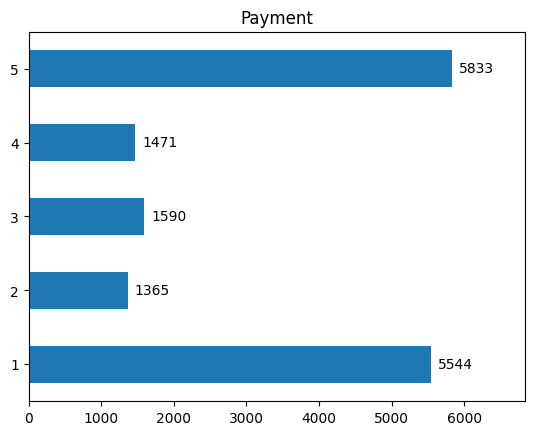

In [196]:
label_per_rating('payment', offset=1000)
plt.title('Payment')

plt.show()

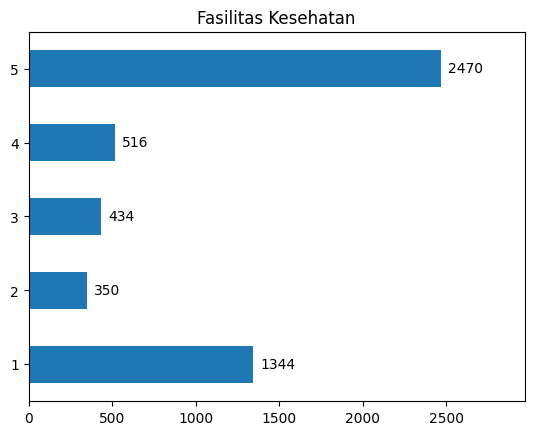

In [197]:
label_per_rating('faskes', offset=500)
plt.title('Fasilitas Kesehatan')

plt.show()

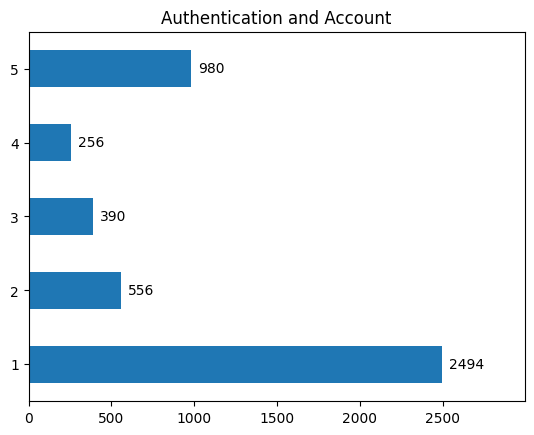

In [198]:
label_per_rating('authentication_and_account', offset=500)
plt.title('Authentication and Account')

plt.show()

## Plot Sentiment Score

In [190]:
def plot_sentiment(df):
    sentiment_dict = {}
    for i in df.iterrows():
        sentiment_dict[i[1]['most_similar_label']] = sentiment_dict.get(i[1]['most_similar_label'], 0) + i[1]['sentiment_score']
        # break

    # calculate mean
    review_counts = dict(df['most_similar_label'].value_counts())

    for key in sentiment_dict:
        sentiment_dict[key] = sentiment_dict[key]/review_counts[key]

    sentiment_df = pd.DataFrame([val for _, val in sentiment_dict.items()], index=sentiment_dict.keys(), columns=['sentiment_score'])
    sentiment_df = sentiment_df.sort_values('sentiment_score')
    ax = sentiment_df.plot.bar()
    ax.bar_label((ax.containers[0]), padding=5, fmt='%.2f')
    ax.axhline(0, color='k')

    ax.legend().remove()

    # ax.set_ylim(bottom = np.min(sentiment_df['sentiment_score']) - 10000,
    #             top = np.max(sentiment_df['sentiment_score']) + 10000,
    # )

    return ax

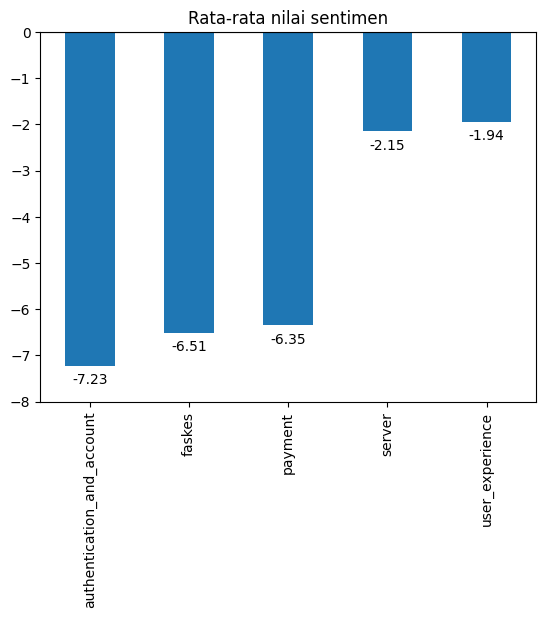

In [193]:
ax = plot_sentiment(model_lbl_similarities)
# [model_lbl_similarities['score'] == 5]
plt.title('Rata-rata nilai sentimen')
ax.set_ylim(bottom = -8)

plt.show()

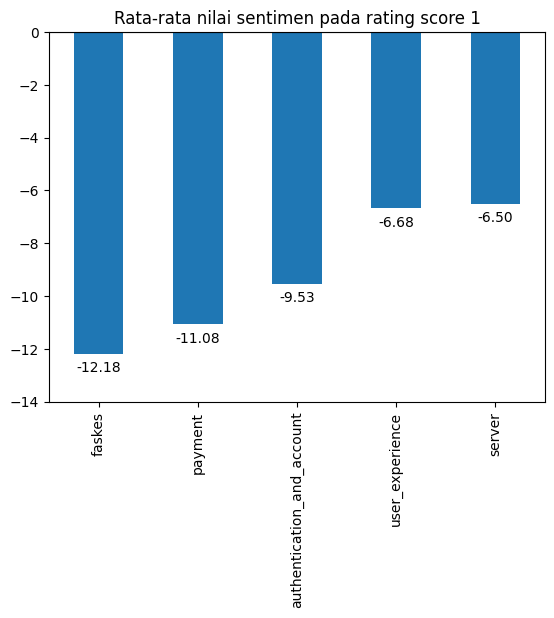

In [201]:
ax = plot_sentiment(model_lbl_similarities[model_lbl_similarities['score'] == 1])
# [model_lbl_similarities['score'] == 5]
plt.title('Rata-rata nilai sentimen pada rating score 1')
ax.set_ylim(bottom = -14)

plt.show()

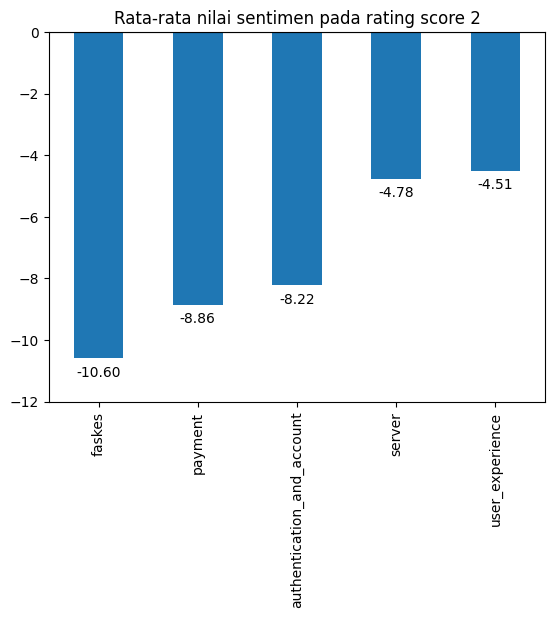

In [204]:
ax = plot_sentiment(model_lbl_similarities[model_lbl_similarities['score'] == 2])
# [model_lbl_similarities['score'] == 5]
plt.title('Rata-rata nilai sentimen pada rating score 2')
ax.set_ylim(bottom = -12)

plt.show()

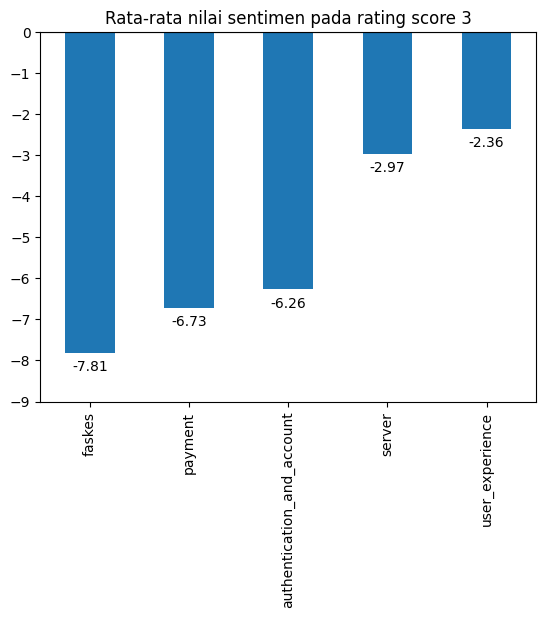

In [206]:
ax = plot_sentiment(model_lbl_similarities[model_lbl_similarities['score'] == 3])
# [model_lbl_similarities['score'] == 5]
plt.title('Rata-rata nilai sentimen pada rating score 3')
ax.set_ylim(bottom = -9)

plt.show()

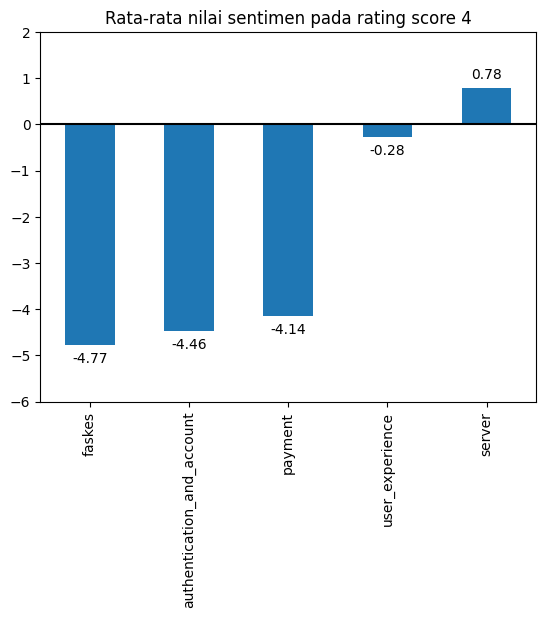

In [211]:
ax = plot_sentiment(model_lbl_similarities[model_lbl_similarities['score'] == 4])
# [model_lbl_similarities['score'] == 5]
plt.title('Rata-rata nilai sentimen pada rating score 4')
ax.set_ylim(bottom = -6, top = 2)

plt.show()

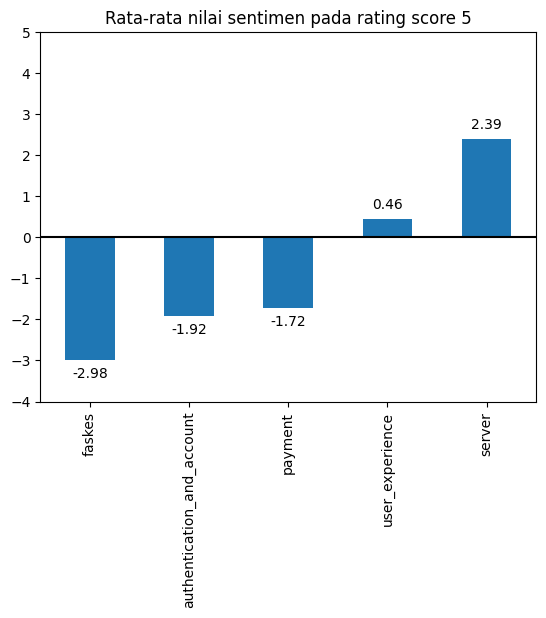

In [214]:
ax = plot_sentiment(model_lbl_similarities[model_lbl_similarities['score'] == 5])
# [model_lbl_similarities['score'] == 5]
plt.title('Rata-rata nilai sentimen pada rating score 5')
ax.set_ylim(bottom = -4, top = 5)

plt.show()

## wordcloud

In [12]:
def remove_stopword(txt):
    sentences = []
    for word in txt.split():
        if word not in stopword:
            sentences.append(word)
    
    return ' '.join(sentences)

In [14]:
def imshow_wordcloud(series):
  series = series.dropna().astype('str').apply(remove_stopword)
  cloud = WordCloud(background_color="white").generate(' '.join(series))
  plt.imshow(cloud.to_array())
  plt.axis('off')


Text(0.5, 1.0, 'Word Cloud Review')

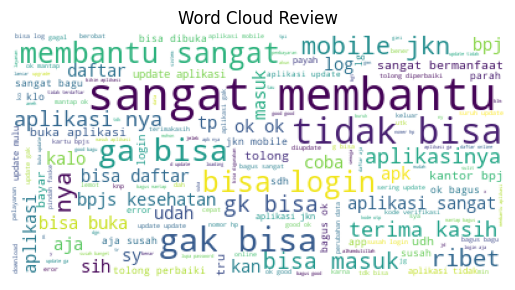

In [19]:
imshow_wordcloud(model_lbl_similarities['CaseFolding'])
plt.title('Word Cloud Review')

In [21]:
set(model_lbl_similarities['most_similar_label'] )

{'authentication_and_account',
 'faskes',
 'payment',
 'server',
 'user_experience'}

Text(0.5, 1.0, 'Word Cloud Review User Experience')

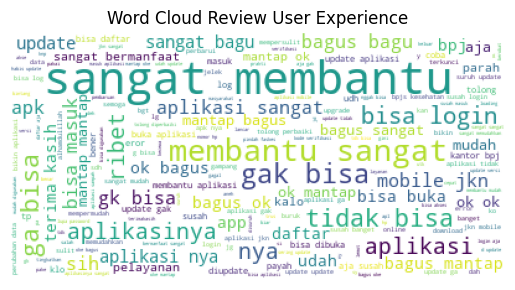

In [20]:
imshow_wordcloud(model_lbl_similarities[model_lbl_similarities['most_similar_label'] == 'user_experience']['CaseFolding'])
plt.title('Word Cloud Review User Experience')

Text(0.5, 1.0, 'Word Cloud Review Server')

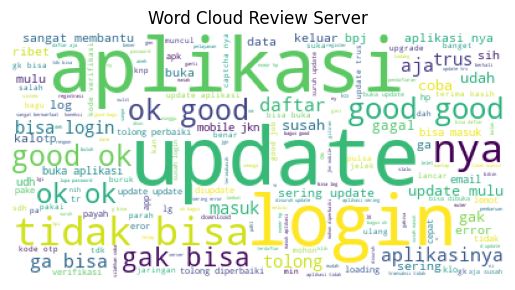

In [21]:
imshow_wordcloud(model_lbl_similarities[model_lbl_similarities['most_similar_label'] == 'server']['CaseFolding'])
plt.title('Word Cloud Review Server')

Text(0.5, 1.0, 'Word Cloud Review Payment')

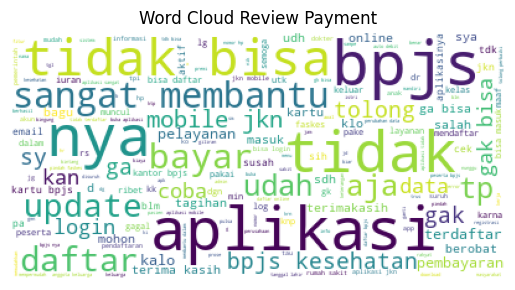

In [22]:
imshow_wordcloud(model_lbl_similarities[model_lbl_similarities['most_similar_label'] == 'payment']['CaseFolding'])
plt.title('Word Cloud Review Payment')

Text(0.5, 1.0, 'Word Cloud Review Fasilitas Kesehatan')

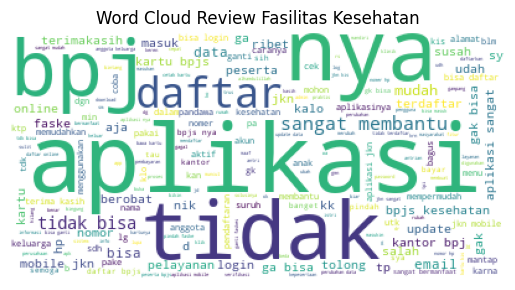

In [23]:
imshow_wordcloud(model_lbl_similarities[model_lbl_similarities['most_similar_label'] == 'faskes']['CaseFolding'])
plt.title('Word Cloud Review Fasilitas Kesehatan')

Text(0.5, 1.0, 'Word Cloud Review Autentikasi dan Akun')

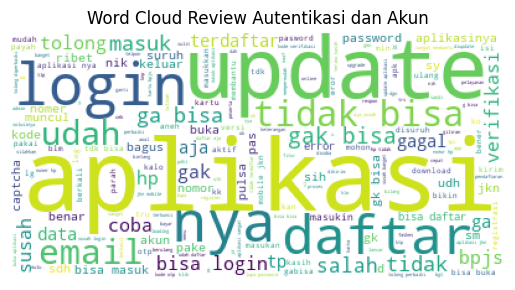

In [24]:
imshow_wordcloud(model_lbl_similarities[model_lbl_similarities['most_similar_label'] == 'authentication_and_account']['CaseFolding'])
plt.title('Word Cloud Review Autentikasi dan Akun')

In [145]:
def plot_review_count(df, offset=10000):
    ax = df['most_similar_label'].value_counts().plot(kind='bar')
    ax.bar_label((ax.containers[0]), padding=5)

    ax.set_ylim(top = np.max(df['most_similar_label'].value_counts()) + offset,
    )

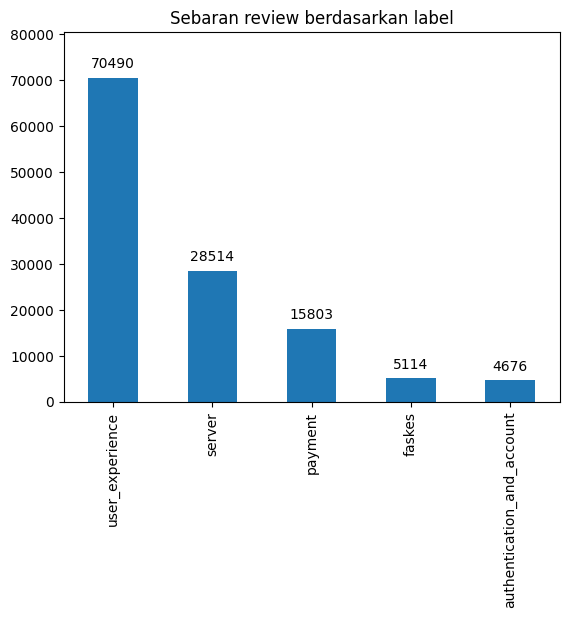

In [146]:
# plot_review_count(model_lbl_similarities)
plot_review_count(model_lbl_similarities)

plt.title('Sebaran review berdasarkan label')
plt.show()

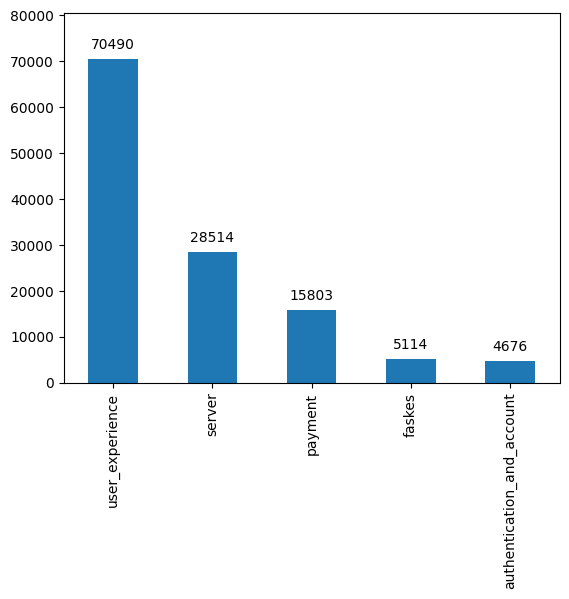

In [134]:
# plot_review_count(model_lbl_similarities)
plot_review_count(model_lbl_similarities)
plt.show()